In [1]:
import os
import sys

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
from hydra import initialize, compose
import pickle
from glob import glob

# set paths to various directories based on the machine this code is being executed on
with initialize(version_base=None, config_path='../../config'):
    config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, figure_dir, pickle_dir, repo_dir  = config.machine.array_dir, config.machine.data_dir, config.machine.figure_dir, config.machine.pickle_dir, config.machine.repo_dir

# enable use of local modules
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

from mejiro.lenses.test import SampleSkyPyLens
from mejiro.plots import diagnostic_plot, plot, plot_util, overplot
from mejiro.analysis import stats
from mejiro.utils import util
from mejiro.helpers import pyhalo

In [2]:
dir = os.path.join(array_dir, 'sample_skypy_lens')

load all

In [18]:
grid_oversample = [1, 3, 5]
num_samples = [100, 1000, 10000, 100000, 1000000, 10000000]

ideal = np.load(os.path.join(dir, 'sample_skypy_lens_5_10000000.npy'))

all_files = glob(dir + '/sample_skypy_lens_*.npy')
grid_1 = [np.load(i) for i in all_files if '_1_' in i]
grid_3 = [np.load(i) for i in all_files if '_3_' in i]
grid_5 = [np.load(i) for i in all_files if '_5_' in i]

get $\chi^2$

In [19]:
chi_squared_1 = [stats.chi_square(i, ideal) for i in grid_1]
chi_squared_3 = [stats.chi_square(i, ideal) for i in grid_3]
chi_squared_5 = [stats.chi_square(i, ideal) for i in grid_5]

print(chi_squared_1)
print(chi_squared_3)
print(chi_squared_5)

[37.847358908056776, 4.854624065190006, 0.5157219416548939, 0.1548118043225048, 0.13149205868721098, 0.12548558463496973]
[31.498044178148042, 3.9741331085614204, 0.32788526336136276, 0.029856828051787684, 0.0032195025926212506, 0.0008079296858627988]
[28.48929253541946, 4.199260066566325, 0.322156918275799, 0.02898597183687895, 0.002368858476371847, 0.0]


In [20]:
print(len(num_samples))
print(len(chi_squared_1), len(chi_squared_3), len(chi_squared_5))

6
6 6 6


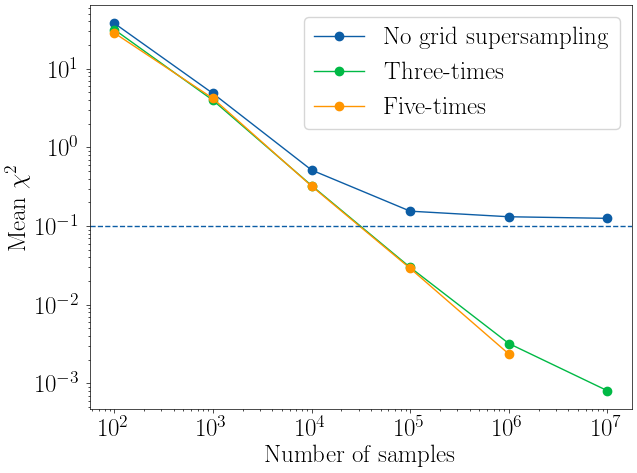

In [28]:
plt.plot(num_samples, chi_squared_1, linestyle='-', marker='o', label='No grid supersampling')
plt.plot(num_samples, chi_squared_3, linestyle='-', marker='o', label='Three-times')
plt.plot(num_samples[:-1], chi_squared_5[:-1], linestyle='-', marker='o', label='Five-times')
plt.axhline(y=0.1, linestyle='--')
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Number of samples')
plt.ylabel('Mean $\chi^2$')
plt.show()